Processando base de dados

Variáveis: file, alg, min_support, separar_paragrafos

In [117]:
import importlib
import utils.pre_processing_news as ppn

importlib.reload(ppn)

#file = "manifestacao_bolsonaro"
#file = "resgate_juliana_marins"
file = "morte_juliana_marins"
#file = "manifestacao_resgate"
separar_paragrafos = True
isTitulo = False

input_file = "datasets/" + file + ".csv"
column = "Título" if isTitulo else "Texto"

# 1. Pré processando base de dados
print("Pré-processando textos...")
pre_processing_result, noticias = ppn.pre_processing_database(
    file_path = input_file,
    separar_paragrafos = separar_paragrafos,
    column=column
)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luiza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Pré-processando textos...


Gerando Trie of Rules

Gerando árvore de regras (TOR)...


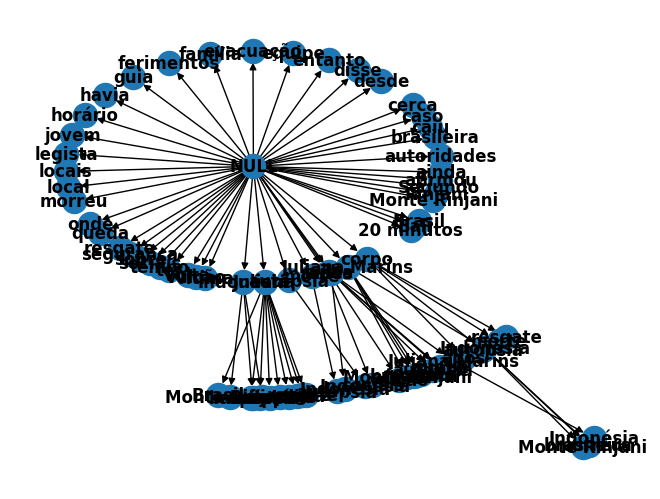

In [118]:
from trieofrules import trieofrules

#supported algorithms: FP-max, FP-growth, Apriori
alg = 'Apriori'
#alg = 'FP-max'
min_support = 0.043

obs = "p" if separar_paragrafos else "n"
obs = "titulos" if isTitulo else obs
file_name = f"{file}_{obs}_{alg}_{min_support}"
output_file = f"outputs/{file_name}.graphml"

# 2. Gera o TOR (Trie of Rules) a partir dos dados
print("Gerando árvore de regras (TOR)...")
TOR = trieofrules(data=pre_processing_result, alg=alg, min_support=min_support)
TOR.draw()

In [119]:
# 3. Salva a visualização e estrutura como .graphml
print("Salvando .graphml...")
TOR.save_graph(filename=output_file)

Salvando .graphml...


Separação de Clusters

In [99]:
import os
import utils.analize_tor as ator
import networkx as nx

pasta = "outputs_clusters"
os.makedirs(pasta, exist_ok=True)

# 5. Separa cluster central dos periféricos
print("Separando cluster central de periféricos...")
G_central, G_perifericos = ator.separar_clusters_por_tamanho(output_file)

# Salva os arquivos
path_cluster_central = os.path.join(pasta, file_name + "_cluster_central.graphml")
path_clusters_perifericos = os.path.join(pasta, file_name + "_clusters_perifericos.graphml")
nx.write_graphml(G_central, path_cluster_central)
nx.write_graphml(G_perifericos, path_clusters_perifericos)

Separando cluster central de periféricos...


Analisando contexto das ocorrências

In [116]:
import utils.analize_tor as ator

importlib.reload(ator)

palavra_mais_usada = next(iter(TOR.frequent_items)).lower() 
ator.concordance(noticias, "20 minutos")

Número de ocorrências: 9

 juliana marins morreu cerca de 20 minutos após cair e sofrer ferimentos g
orte tenha ocorrido em cerca de 20 minutos após o ferimento”, afirmou o mé
eve hipotermia e sobreviveu por 20 minutos após o trauma. o laudo da períc
. [ela sobreviveu por] menos de 20 minutos.”  o legista não soube precisar
sta não soube precisar se esses 20 minutos ocorreram logo após a primeira 
 de juliana ocorreu em torno de 20 minutos após ela sofrer os ferimentos. 
ana tenha agonizado por mais de 20 minutos após o trauma que causou sua mo
orragia, a morte levou menos de 20 minutos para ocorrer. a equipe também d
ediata, ocorrendo no máximo até 20 minutos após o impacto. o especialista 


Recomendar notícia mais compacta e relevante

In [109]:
import utils.analize_tor as ator

importlib.reload(ator)

proporcoes, resumo = ator.recomendar_texto(noticias, output_file)
print("Texto recomendado:", resumo)

Melhor proporção: 28.76
Texto recomendado: O ex-presidente Jair Bolsonaro (PL) reuniu cerca de 44,9 mil apoiadores na Avenida Paulista, em São Paulo, neste domingo, 6, para pedir o perdão político aos condenados pela invasão às sedes dos Três Poderes, em 8 de janeiro de 2023.

A estimativa é do Monitor do Debate Público do Meio Digital, da Universidade de São Paulo (USP), que fez o levantamento a partir de fotos aéreas do momento de pico da manifestação, durante o discurso de Bolsonaro, que iniciou cerca de 15h44 e durou 25 minutos.

Em fevereiro do ano passado, quando Bolsonaro também foi à Paulista pedir anistia aos presos do 8 de Janeiro, o ex-presidente reuniu cerca de 185 mil manifestantes, conforme a mesma contagem da USP. Já a Secretaria de Segurança Pública (SSP) estimou 600 mil pessoas presentes. Neste ano, tanto a Secretaria como a Polícia Militar informaram que não haverá estimativa de público.

Em setembro do ano passado, pedindo o impeachment do ministro Alexandre de Morae

Outras visualizações

In [73]:
import utils.pre_processing_news as ppn
importlib.reload(ppn)

pre_processing_result_simples, noticias = ppn.pre_processing_database(
    file_path = input_file,
    separar_paragrafos = separar_paragrafos,
    column=column,
    simples=True
)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luiza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [87]:
#Nuvem de palavras

import csv
import os
import importlib
import utils.other_visualizations as ovi

importlib.reload(ovi)

pasta_raking = "ranking_palavras"
os.makedirs(pasta_raking, exist_ok=True)

ranking = ovi.ranking_words(pre_processing_result_simples, remove_duplicidades=True)
file_ranking = os.path.join(pasta_raking, f"{file_name}_ranking_palavras.csv")
with open(file_ranking, mode="w", newline="", encoding="utf-8") as arquivo_csv:
    writer = csv.writer(arquivo_csv)
    writer.writerows(ranking)

In [ ]:
#Word Tree - Todos os textos como uma string 

print(" ".join(noticias))

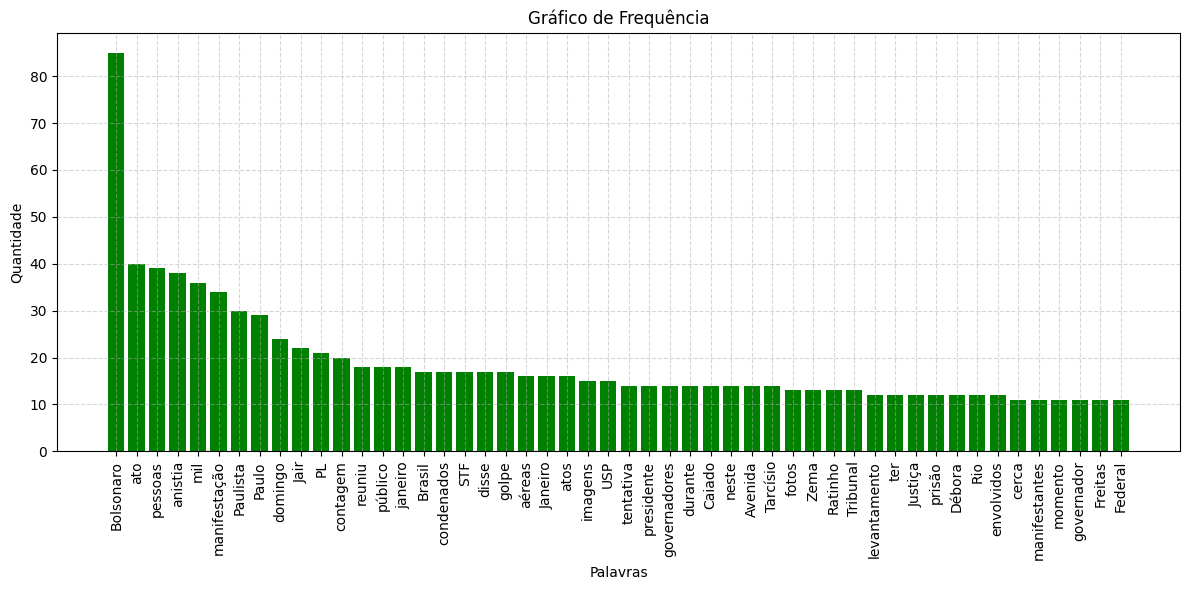

In [90]:
# Gráfico de frequência

import pandas as pd
import utils.other_visualizations as ovi

importlib.reload(ovi)

df = pd.read_csv(file_ranking, names=['palavra', 'quantidade'])
ovi.scartter_plot_from_ranking(df)


In [82]:
#Grafo de Coocorrência
import utils.other_visualizations as ovi

importlib.reload(ovi)


pasta_raking = "ranking_palavras"
os.makedirs(pasta_raking, exist_ok=True)

file_grafo = os.path.join(pasta_raking, f"{file_name}_grafo.gdf")
ovi.generate_graph_file(pre_processing_result_simples, file_grafo)
